In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Load the datasets
movies_df = pd.read_csv("/content/drive/MyDrive/tmdb_5000_movies.csv")
credits_df = pd.read_csv("/content/drive/MyDrive/tmdb_5000_credits.csv")

# View top 5 rows
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Merge credits and movies on 'title'
merged_df = movies_df.merge(credits_df, on='title')

# Show shape and columns
print("Shape:", merged_df.shape)
merged_df.columns


Shape: (4809, 23)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [7]:
merged_df.isnull().sum()


,0
budget,0
genres,0
homepage,3096
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [8]:
# Remove rows with 0 budget or 0 revenue
merged_df = merged_df[(merged_df['budget'] > 0) & (merged_df['revenue'] > 0)]

# Reset index
merged_df.reset_index(drop=True, inplace=True)

print("Remaining rows:", merged_df.shape[0])


Remaining rows: 3232


In [9]:
# Create a new column: ROI (Return on Investment)
merged_df['roi'] = merged_df['revenue'] / merged_df['budget']

# Define success class
def get_success_class(roi):
    if roi >= 1.5:
        return "Hit"
    elif roi >= 0.8:
        return "Average"
    else:
        return "Flop"

merged_df['success_class'] = merged_df['roi'].apply(get_success_class)

# Check class distribution
merged_df['success_class'].value_counts()


,count
success_class,
Hit,2112
Flop,631
Average,489


In [10]:
merged_df[['title', 'budget', 'revenue', 'roi', 'success_class']].head()


,title,budget,revenue,roi,success_class
0,Avatar,237000000,2787965087,11.763566,Hit
1,Pirates of the Caribbean: At World's End,300000000,961000000,3.203333,Hit
2,Spectre,245000000,880674609,3.594590,Hit
3,The Dark Knight Rises,250000000,1084939099,4.339756,Hit
4,John Carter,260000000,284139100,1.092843,Average


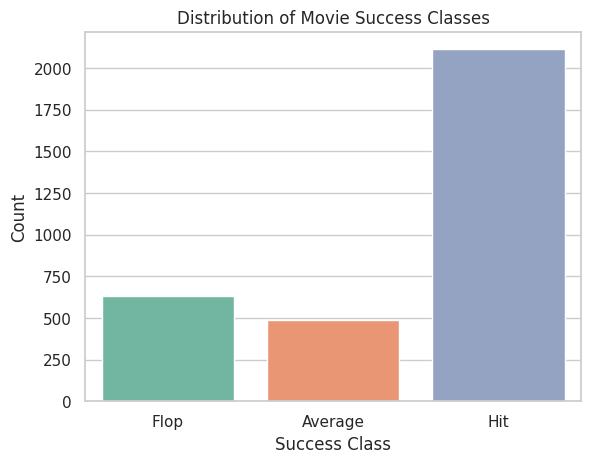

In [11]:
# Visualize target label distribution
sns.countplot(data=merged_df, x='success_class', order=['Flop', 'Average', 'Hit'], palette='Set2')
plt.title("Distribution of Movie Success Classes")
plt.xlabel("Success Class")
plt.ylabel("Count")
plt.show()


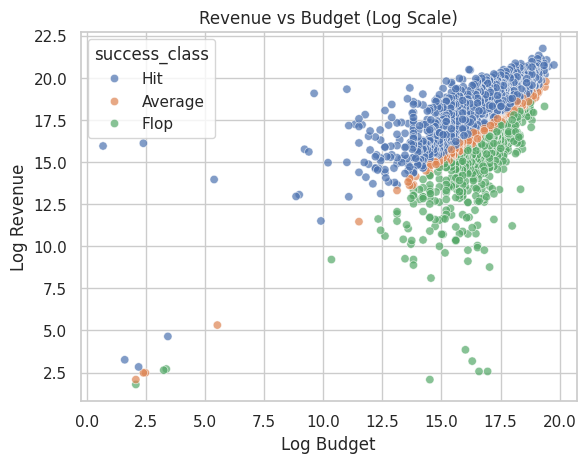

In [12]:
import numpy as np

# Add log values to avoid scale issues
merged_df['log_budget'] = np.log1p(merged_df['budget'])
merged_df['log_revenue'] = np.log1p(merged_df['revenue'])

# Plot
sns.scatterplot(data=merged_df, x='log_budget', y='log_revenue', hue='success_class', alpha=0.7)
plt.title("Revenue vs Budget (Log Scale)")
plt.xlabel("Log Budget")
plt.ylabel("Log Revenue")
plt.show()


In [13]:
import ast

# Function to extract genre names
def extract_genres(genre_str):
    genres = ast.literal_eval(genre_str)
    return [g['name'] for g in genres]

merged_df['genre_list'] = merged_df['genres'].apply(extract_genres)

# Get top 10 genres
from collections import Counter

all_genres = sum(merged_df['genre_list'], [])
top_genres = [g for g, _ in Counter(all_genres).most_common(10)]

# Create binary columns for top genres
for genre in top_genres:
    merged_df[f'genre_{genre}'] = merged_df['genre_list'].apply(lambda x: int(genre in x))


In [14]:
# Extract top 3 cast members
def extract_cast(cast_str):
    cast = ast.literal_eval(cast_str)
    return [member['name'] for member in cast[:3]]

merged_df['top_cast'] = merged_df['cast'].apply(extract_cast)

# Extract director from crew column
def extract_director(crew_str):
    crew = ast.literal_eval(crew_str)
    for member in crew:
        if member['job'] == 'Director':
            return member['name']
    return np.nan

merged_df['director'] = merged_df['crew'].apply(extract_director)


In [15]:
from collections import Counter

# Top 10 directors
Counter(merged_df['director']).most_common(10)

# Top 10 actors
actor_list = sum(merged_df['top_cast'], [])
Counter(actor_list).most_common(10)


[('Robert De Niro', 39),
 ('Matt Damon', 33),
 ('Johnny Depp', 31),
 ('Bruce Willis', 31),
 ('Nicolas Cage', 30),
 ('Brad Pitt', 29),
 ('Tom Cruise', 28),
 ('Morgan Freeman', 28),
 ('Denzel Washington', 28),
 ('Mark Wahlberg', 27)]

In [16]:
features = [
    'budget', 'log_budget',
    'genre_Action', 'genre_Adventure', 'genre_Comedy', 'genre_Drama',
    'genre_Thriller', 'genre_Romance', 'genre_Science Fiction',
    # You can add other genres here
]

# Label
target = 'success_class'

final_df = merged_df[features + [target]]
final_df.head()


,budget,log_budget,genre_Action,genre_Adventure,genre_Comedy,genre_Drama,genre_Thriller,genre_Romance,genre_Science Fiction,success_class
0,237000000,19.283571,1,1,0,0,0,0,1,Hit
1,300000000,19.519293,1,1,0,0,0,0,0,Hit
2,245000000,19.316769,1,1,0,0,0,0,0,Hit
3,250000000,19.336971,1,0,0,1,1,0,0,Hit
4,260000000,19.376192,1,1,0,0,0,0,1,Average


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
# Features and label
X = final_df.drop('success_class', axis=1)
y = final_df['success_class']

# Encode labels (Flop = 0, Average = 1, Hit = 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (2585, 9)
Testing shape: (647, 9)


In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.6568778979907264
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        95
        Flop       0.00      0.00      0.00       127
         Hit       0.66      1.00      0.79       425

    accuracy                           0.66       647
   macro avg       0.22      0.33      0.26       647
weighted avg       0.43      0.66      0.52       647



In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Random Forest Accuracy: 0.5625965996908809
              precision    recall  f1-score   support

     Average       0.16      0.12      0.14        95
        Flop       0.23      0.12      0.16       127
         Hit       0.66      0.80      0.72       425

    accuracy                           0.56       647
   macro avg       0.35      0.34      0.34       647
weighted avg       0.50      0.56      0.52       647



In [21]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


XGBoost Accuracy: 0.5965996908809892
              precision    recall  f1-score   support

     Average       0.06      0.02      0.03        95
        Flop       0.27      0.10      0.15       127
         Hit       0.66      0.87      0.75       425

    accuracy                           0.60       647
   macro avg       0.33      0.33      0.31       647
weighted avg       0.49      0.60      0.53       647



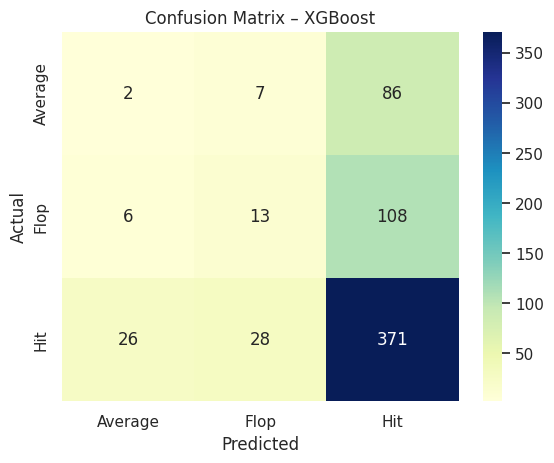

In [22]:
conf_mat = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost")
plt.show()


In [23]:
import pickle

# Save model
with open('cine_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

# Save label encoder too
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [24]:
from google.colab import files
files.download('cine_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
from google.colab import files
files.download('label_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>